# Introduction to Scikit-learn (Sklearn)

This notebook demonstrates some of the most useful functions of the 
Scikit-Learn library.

What we will cover

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

In [1]:
import numpy as np 

# 0. An end-to-end Scikit-Learn workflow

Using the heart disease data we will predict the target column (i.e does the patient 
have heart disease or not)

x = age, sex, cp, trestbps,	chol, fbs, restecg, thalach, exang,	oldpeak, slope,	ca, thal

y = target

In [2]:
# Standard imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# 1. Get the data ready
import pandas as pd
Heart_disease =pd.read_csv("heart-disease.csv")
Heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Create the features matrix (X)

X = Heart_disease.drop('target', axis = 1)

# Create y (labels)
Y =Heart_disease['target']

In [5]:
# 2. Choose the right model and hyperparameters

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We will keep the default hyperparameters 
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the training data 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [7]:
clf.fit(X_train, Y_train);

In [8]:
X_train 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3


In [9]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2


In [10]:
# Make a prediction
Y_preds =clf.predict(X_test)
Y_preds

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [11]:
Y_test

118    1
96     1
40     1
181    0
214    0
      ..
7      1
301    0
8      1
13     1
44     1
Name: target, Length: 61, dtype: int64

In [12]:
# 4. Evaluate the model on the training data and test data

clf.score(X_train, Y_train)

1.0

In [14]:
clf.score(X_test, Y_test)

0.819672131147541

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        31
           1       0.81      0.83      0.82        30

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [16]:
confusion_matrix(Y_test, Y_preds)

array([[25,  6],
       [ 5, 25]], dtype=int64)

In [17]:
accuracy_score(Y_test, Y_preds)

0.819672131147541

In [18]:
# 5. Improve the model (Hyperparameter tuning)
# Try different amounts of n-estimators

np.random.seed(42)
for i in range(10, 100, 10):
    print(f" Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators = i).fit(X_train, Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, Y_test)*100:.4f}%")
    print(" ")

 Trying model with 10 estimators...
Model accuracy on test set: 81.9672%
 
 Trying model with 20 estimators...
Model accuracy on test set: 77.0492%
 
 Trying model with 30 estimators...
Model accuracy on test set: 80.3279%
 
 Trying model with 40 estimators...
Model accuracy on test set: 83.6066%
 
 Trying model with 50 estimators...
Model accuracy on test set: 83.6066%
 
 Trying model with 60 estimators...
Model accuracy on test set: 81.9672%
 
 Trying model with 70 estimators...
Model accuracy on test set: 83.6066%
 
 Trying model with 80 estimators...
Model accuracy on test set: 83.6066%
 
 Trying model with 90 estimators...
Model accuracy on test set: 83.6066%
 


In [19]:
# 6. Save the model(on onedrive) and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pk1", "wb"))

In [20]:
# Load the saved model
loaded_model = pickle.load(open("random_forest_model_1.pk1", "rb"))
loaded_model.score(X_test, Y_test)

0.8360655737704918

In [36]:
# To ignore warnings 
# import warnings
# warnings.filterwarnings("ignore")

# Data preparation explained

### 1. Getting our data ready 

Three things to do
1. Split the data into features and labels (usually X & Y)
2. Filling (or imputing) or disregarding missing values
3. Converting non-numerical values to numerical values(feature encoding) 

In [21]:
Heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
X = Heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
Y = Heart_disease["target"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [25]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((242, 13), (61, 13), (242,), (61,))

## Make sure all data is numerical 

In [27]:
Car_sales = pd.read_csv("scikit-learn-data/car-sales-extended.csv")
Car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [28]:
Car_sales.shape

(1000, 5)

In [29]:
Car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [30]:
# Doors will be treated as a category in onehotencoder
Car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [33]:
# Split into X/Y
Car_salesX = Car_sales.drop("Price", axis = 1)
Car_salesY = Car_sales["Price"]

#Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(Car_salesX, Car_salesY, test_size = 0.2)

In [34]:
# Build machine learning model 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

ValueError: could not convert string to float: 'Toyota'

In [35]:
# Model failed because we didn't use OneHotEncoding

In [36]:
Car_salesX

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [79]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features =["Make", 'Colour', "Doors"]
One_hot = OneHotEncoder()
# https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/
Transformer = ColumnTransformer([("One_hot", One_hot, categorical_features)], remainder ="passthrough")
Transformed_X = Transformer.fit_transform(Car_salesX)
Transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [80]:
pd.DataFrame(Transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [77]:
len(Transformed_X)

1000

In [48]:
# Dummies can be used in place of OneHotEncoder
Dummies = pd.get_dummies(Car_sales[["Make", "Colour", "Doors"]])
Dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [50]:
# Lets refit the model
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(Transformed_X, Car_salesY, test_size = 0.2)
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [51]:
model.score(X_test, Y_test)

0.3235867221569877

## Dealing with missing values
1. Fill them with some values (also known as imputation).
2. Remove the samples with missing data altogether.

In [52]:
# Import car sales missing data

Car_sales_missing = pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")
Car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [53]:
# Show the missing values 
Car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
# Split data into X and Y

In [55]:
Car_sales_missingX = Car_sales_missing.drop("Price", axis = 1)
Car_sales_missingY = Car_sales_missing["Price"]

### Option 1: Fill missing data with Pandas


In [57]:
# Fill the "Make" column
Car_sales_missing["Make"].fillna("missing",inplace =True )

#Fill the "Colour" column
Car_sales_missing["Colour"].fillna("missing", inplace =True)

# Fill the "Odometer (KM)" column
Car_sales_missing["Odometer (KM)"].fillna(Car_sales_missing["Odometer (KM)"].mean(), inplace = True)

#Fill the "Doors" column
Car_sales_missing["Doors"].fillna(4, inplace = True) # 4 is the mode for the "Doors column"



In [58]:
Car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [60]:
# Remove rows with missing price value
Car_sales_missing.dropna(inplace =True)

In [61]:
Car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [63]:
# We lost 50 datasets 
len(Car_sales_missing)

950

In [83]:
Car_sales_missingX = Car_sales_missing.drop("Price", axis = 1)
Car_sales_missingY = Car_sales_missing["Price"]

#Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(Car_sales_missingX, Car_sales_missingY, test_size = 0.2)

In [84]:
# Convert the data to numerical data

categorical_features =["Make", 'Colour', "Doors"]
One_hot = OneHotEncoder()
# https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/
Transformer = ColumnTransformer([("One_hot", One_hot, categorical_features)], remainder ="passthrough")
Transformed_X = Transformer.fit_transform(Car_sales_missingX)
Transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [67]:
pd.DataFrame(Transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


### Option 2: Fill missing values with Scikit-Learn

In [3]:
Car_sales_missing2 = pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")
Car_sales_missing2.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [4]:
Car_sales_missing2.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [5]:
# Drop the missing values from the dependent variable ("Price")
Car_sales_missing2.dropna(subset =["Price"], inplace =True)
Car_sales_missing2.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [6]:
# Split into X and Y
Car_sales_missing2X = Car_sales_missing2.drop("Price", axis =1)
Car_sales_missing2Y = Car_sales_missing2["Price"]

In [7]:
Car_sales_missing2X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [10]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer #Imputer fills missing values
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" & numerical values with mean
Cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
Door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
Num_imputer = SimpleImputer(strategy = "mean")

# Define columns
Cat_features = ["Make", "Colour"]
Door_features = ["Doors"]
Num_features =["Odometer (KM)"]

# Create an imputer (Something that fills missing data)
imputer = ColumnTransformer([("Cat_imputer", Cat_imputer, Cat_features),
                            ("Door_imputer", Door_imputer, Door_features),
                            ("Num_imputer", Num_imputer, Num_features)])

# Transform the data
filled_X = imputer.fit_transform(Car_sales_missing2X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [18]:
Car_sales_filled = pd.DataFrame(filled_X, columns = ["Make", "Colour","Doors", "Odometer (KM)"])
Car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [19]:
Car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [20]:
# Convert to numerical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features =["Make", 'Colour', "Doors"]
One_hot = OneHotEncoder()
# https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/
Transformer = ColumnTransformer([("One_hot", One_hot, categorical_features)], remainder ="passthrough")
Transformed_X = Transformer.fit_transform(Car_sales_filled)
Transformed_X


<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [21]:
# Fit the model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Transformed_X,Car_sales_missing2Y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.21990196728583944

## Choosing the right estimator/algorithm for our problem
Scikit-learn uses estimator as another terns for machine learning model or algorithm 

* Classification - Predicting a true/false 
* Regression - Predicting a number 

### Picking a machine learning model for a regression problem

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

<img src = "Right_estimator.PNG">

In [24]:
# Import Boston Housing dataset 
from sklearn.datasets import load_boston
boston = load_boston()
boston;


In [26]:
boston_df = pd.DataFrame(boston["data"], columns =boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
len(boston_df)

506

In [30]:
# Lets try the Ridge Regression problem 
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

#Create the data
bostonX = boston_df.drop("target", axis=1)
bostonY = boston_df["target"]

#Split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(bostonX, bostonY, test_size= 0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, Y_train)

# Check the score of the Ridge model on test data
model.score(X_test, Y_test)

0.6662221670168522

### What if Ridge Regression wasn't working? How do we improve our score? 
* Follow the Scikit-Learn map 

** Lets try the random forest regression 

In [33]:
# Trying the RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

# Setup a random seed
np.random.seed(42)

#Create the data
bostonX = boston_df.drop("target", axis=1)
bostonY = boston_df["target"]

#Split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(bostonX, bostonY, test_size= 0.2)

# Instantiate the RandomForest model
model2 = RandomForestRegressor()
model2.fit(X_train, Y_train)

# Check the score of the RandomForest model on test data
model2.score(X_test, Y_test)

0.873969014117403

## Choosing an estimator for a classification problem

In [34]:
Heart_Disease2 = pd.read_csv("heart-disease.csv")
Heart_Disease2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
len(Heart_Disease2)

303

In [36]:
# Using the sklearn map and employing LinearSVC estimator

from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
Heart_DiseaseX = Heart_Disease2.drop("target", axis = 1)
Heart_DiseaseY = Heart_Disease2["target"]

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(Heart_DiseaseX, Heart_DiseaseY, test_size= 0.2)

# Instantiate LinearSVC
L_SVC = LinearSVC()
L_SVC.fit(X_train, Y_train)

# Evaluate the LinearSVC
L_SVC.score(X_test, Y_test)

C:\Users\micha\Anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4918032786885246

In [37]:
Heart_Disease2["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [38]:
# Using the sklearn map and employing RandomForestClassifier estimator

from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
Heart_DiseaseX = Heart_Disease2.drop("target", axis = 1)
Heart_DiseaseY = Heart_Disease2["target"]

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(Heart_DiseaseX, Heart_DiseaseY, test_size= 0.2)

# Instantiate RandomForestClassifier
R_FC = RandomForestClassifier()
R_FC.fit(X_train, Y_train)

# Evaluate the RandomForestClassifier
R_FC.score(X_test, Y_test)

0.8524590163934426

tidbit

    If you have structured data use ensemble methods
    
    For unstructured data use deep learning or transfer learning
        

## Fit the model/algorithm on our data and use it to make predictions

### Fitting the model to the data

Different names for:
* Heart_DiseaseX = features, features variables, data
* Heart_DiseaseY = labels, targets, target variables

In [ ]:
# Using the sklearn map and employing RandomForestClassifier estimator

from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
Heart_DiseaseX = Heart_Disease2.drop("target", axis = 1)
Heart_DiseaseY = Heart_Disease2["target"]

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(Heart_DiseaseX, Heart_DiseaseY, test_size= 0.2)

# Instantiate RandomForestClassifier
R_FC = RandomForestClassifier()

# Fit the model to the data (training the machine learning model by learning the patterns)
R_FC.fit(X_train, Y_train)

# Evaluate the RandomForestClassifier (Use the pattern the machine learning has learned)
R_FC.score(X_test, Y_test)

## Random forest deep dive links 
https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
    

## Make predictions using a machine learning model

Two ways to make predictions 
1. predict()
2. predict_proba() 

In [46]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [48]:
# What our model predicted
R_FC.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [49]:
# The truth 
np.array(Y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [50]:
# Compare predictions to truth labels to evaluate the model
Y_preds = R_FC.predict(X_test)
np.mean(Y_preds == Y_test)

0.8524590163934426

In [51]:
R_FC.score(X_test, Y_test)

0.8524590163934426

In [53]:
# Another method
from sklearn.metrics import accuracy_score
accuracy_score(Y_preds, Y_test)

0.8524590163934426

 #### Make predictions with predict_proba()
 Returns probabilities of a classification label being True or False

In [59]:
R_FC.predict_proba(X_test[:10])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [60]:
# Let's predict on the same data
R_FC.predict(X_test[:10])

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

### Using predict() for regression models

In [61]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [62]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data 
Boston_RF_X = boston_df.drop("target", axis = 1) 
Boston_RF_Y = boston_df["target"]

# Split into training and test sets 
X_train, X_test, Y_train, Y_test = train_test_split(Boston_RF_X, Boston_RF_Y, test_size = 0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(X_train, Y_train)

# Make predictions 
Y_preds = model.predict(X_test)

In [65]:
Y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [64]:
len(Y_preds)

102

In [66]:
np.array(Y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [67]:
# Compare the predictions to the truth 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, Y_preds)

2.1226372549019623

The results shows that our model is 2.1 away from our target value

## Evaluating a machine learning model
https://scikit-learn.org/stable/modules/model_evaluation.html

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator 'score' method
2. The scoring parameter
3. Problem-specific metric functions

### 1. Evaluating a model with the 'score' method

In [71]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Make the data
Heart_DiseaseX = Heart_Disease2.drop("target", axis = 1)
Heart_DiseaseY = Heart_Disease2["target"]

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(Heart_DiseaseX, Heart_DiseaseY, test_size= 0.2)

# Instantiate RandomForestClassifier
R_FC = RandomForestClassifier()
R_FC.fit(X_train, Y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
R_FC.score(X_train, Y_train)

1.0

In [73]:
# Returns the mean accuracy on the given test data and labels
R_FC.score(X_test, Y_test)

0.8524590163934426

### Lets do the same for regression

In [74]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data 
Boston_RF_X = boston_df.drop("target", axis = 1) 
Boston_RF_Y = boston_df["target"]

# Split into training and test sets 
X_train, X_test, Y_train, Y_test = train_test_split(Boston_RF_X, Boston_RF_Y, test_size = 0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(X_train, Y_train)


In [75]:
# Make predictions(Return the coefficient of determination R^2 of the prediction.)
model.score(X_test, Y_test)

0.873969014117403

### 2. Evaluating a model using the 'scoring' parameter

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Make the data
Heart_DiseaseX = Heart_Disease2.drop("target", axis = 1)
Heart_DiseaseY = Heart_Disease2["target"]

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(Heart_DiseaseX, Heart_DiseaseY, test_size= 0.2)

# Instantiate RandomForestClassifier
R_FC = RandomForestClassifier()
R_FC.fit(X_train, Y_train); 

In [78]:
R_FC.score(X_test, Y_test)

0.8524590163934426

In [79]:
# 5 fold cross- validation (default)
cross_val_score(R_FC, Heart_DiseaseX, Heart_DiseaseY)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [80]:
# 10 fold cross - validation(cv =10)
cross_val_score(R_FC, Heart_DiseaseX, Heart_DiseaseY, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

#### Comparing single score with 5 fold cross validation

In [81]:
np.random.seed(42)

# Single training and test split score
R_FC_Single_score = R_FC.score(X_test, Y_test)

# Take the mean of 5-fold cross-validation score
R_FC_Cross_Val_Score = np.mean(cross_val_score(R_FC, Heart_DiseaseX, Heart_DiseaseY))

# Compare the two
R_FC_Single_score, R_FC_Cross_Val_Score

(0.8524590163934426, 0.8248087431693989)

In [82]:
# Scoring parameter set to None by default 
cross_val_score(R_FC, Heart_DiseaseX, Heart_DiseaseY, scoring =None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

## Classification model evaluation metrics
https://scikit-learn.org/stable/modules/model_evaluation.html
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

### 1. Accuracy

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Make the data
Heart_DiseaseX = Heart_Disease2.drop("target", axis = 1)
Heart_DiseaseY = Heart_Disease2["target"]

R_FC = RandomForestClassifier()
Cross_val_score = cross_val_score(R_FC, Heart_DiseaseX, Heart_DiseaseY)
Cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [87]:
# Get the mean of the Cross_val_score
np.mean(Cross_val_score)

0.8248087431693989

In [91]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(Cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


### 2. Area under the receiver operating characteristic curve (AUC/ROC)
* Area under curve (AUC)
* ROC (Receiver operating curve)

ROC curves is a comparion of a model's true positive rate (tpr) versus a models false positive rate (fpr)

* using the heart disease example where:
        * 0 = No heart disease 
        * 1 = Heart disease
* True positive =model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negetive  = model predicts 0 when truth is 0 
* False negetive = model predicts 0 when truth is 1

In [ ]:
# Create X_test... etc
X_train, X_test, Y_train, Y_test = train_test_split(Heart_DiseaseX, Heart_DiseaseY, test_size= 0.2)

In [94]:
from sklearn.metrics import roc_curve

#Fit the classifier
R_FC.fit(X_train, Y_train)

# Make predictions with probabilities 
Y_probs = R_FC.predict_proba(X_test)

Y_probs[:10], len(Y_probs)

(array([[0.88, 0.12],
        [0.49, 0.51],
        [0.46, 0.54],
        [0.87, 0.13],
        [0.24, 0.76],
        [0.11, 0.89],
        [0.27, 0.73],
        [0.93, 0.07],
        [0.95, 0.05],
        [0.49, 0.51]]),
 61)

In [96]:
Y_probs_positive = Y_probs[:,1]
Y_probs_positive[:10]

array([0.12, 0.51, 0.54, 0.13, 0.76, 0.89, 0.73, 0.07, 0.05, 0.51])

In [97]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds =roc_curve(Y_test, Y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.06896552, 0.06896552,
       0.13793103, 0.13793103, 0.13793103, 0.17241379, 0.20689655,
       0.20689655, 0.31034483, 0.44827586, 0.65517241, 0.68965517,
       0.72413793, 1.        ])

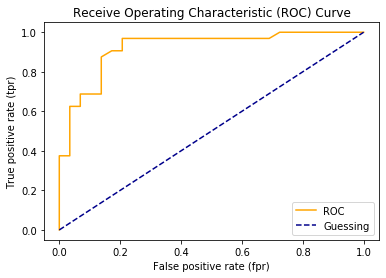

In [101]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """" Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model """
    # Plot roc curve
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
    #Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color ="darkblue", linestyle = "--", label = "Guessing")
    
    # Customize the plot
    plt.xlabel ("False positive rate (fpr)")
    plt.ylabel ("True positive rate (tpr)")
    plt.title ("Receive Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [102]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, Y_probs_positive)

0.9213362068965517

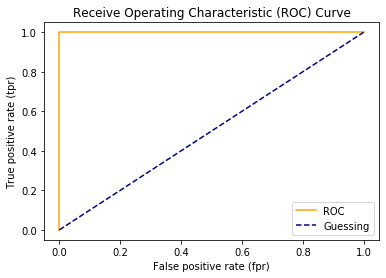

In [103]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(Y_test, Y_test)
plot_roc_curve(fpr,tpr)

In [104]:
# Perfect AUC score
roc_auc_score(Y_test, Y_test)

1.0

### 3. Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. 
In essence, giving you an idea of where the model is getting confused

In [105]:
from sklearn.metrics import confusion_matrix

Y_preds = R_FC.predict(X_test)
confusion_matrix(Y_test, Y_preds)

array([[24,  5],
       [ 3, 29]], dtype=int64)

In [106]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(Y_test, Y_preds, rownames =["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,3,29


In [109]:
# How to install a conda package into the current environment from a Jupyter Notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

## Package Plan ##





==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda




  environment location: C:\Users\micha\Anaconda3\envs\tf

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         122 KB
    certifi-2020.11.8          |   py37haa95532_0         147 KB
    openssl-1.1.1h             |       he774522_0         4.8 MB
    seaborn-0.11.0             |             py_0         210 KB
    ------------------------------------------------------------
                                           Total:         5.3 MB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.11.0-py_0

The following packages will be UPDATED:

  ca-certificates                                2020.1.1-0 --> 2020.10.14-0
  certifi                                 2020.4.5.1-py37_0 --> 2020.11.8-py37haa95532_0
  openssl                                 1.1.1g-he7

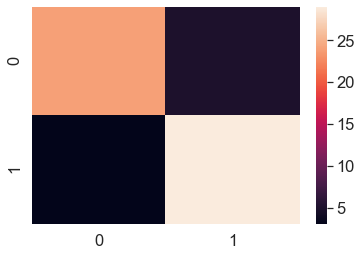

In [110]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

#Set the font scale
sns.set(font_scale =1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(Y_test, Y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

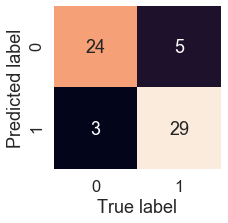

In [117]:
def plot_conf_mat(conf_mat):
    """Plots a confusion matrix using Seaborn's heatmap()"""
    
    fig, ax = plt.subplots(figsize =(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True, # Annotate the boxes with conf_mat info
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label");
    
plot_conf_mat(conf_mat)
                                

### 4. Classification Report

In [118]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

<img src= "classification_report.PNG">

In [120]:
# Where precision and recall become valuable
# Assuming 1000 people and 1 have a disease

Disease_true =np.zeros(10000)
Disease_true[0] = 1 # only one positive case

Disease_preds = np.zeros(10000) #model predicts every case as 0 

pd.DataFrame(classification_report(Disease_true, Disease_preds, output_dict = True))

C:\Users\micha\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


## Regression model evaluation metrics

https://scikit-learn.org/stable/modules/model_evaluation.html

https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python/37861832#37861832

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

### 1. R^2 (R-squared)

R^2 - Compares your models predictions to the mean of the targets. Values can range from negetive infinity (a very poor model) to 1. For eg, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers, it's R^2 value would be 1.

In [122]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

BostonX = boston_df.drop("target", axis=1)
BostonY = boston_df["target"]

X_train, X_test, Y_train, Y_test = train_test_split(BostonX, BostonY, test_size = 0.2)

model = RandomForestRegressor().fit(X_train, Y_train)

In [123]:
model.score(X_test, Y_test)

0.873969014117403

In [124]:
from sklearn.metrics import r2_score

# Fill an array with Y_test mean
Y_test_mean = np.full(len(Y_test), Y_test.mean()) 

In [125]:
Y_test.mean()

21.488235294117644

In [126]:
r2_score(Y_test, Y_test_mean)

0.0

In [127]:
r2_score(Y_test, Y_test)

1.0

### Mean absolute Error (MAE)
MAE is the average of the absolute differences between predictions and actual values. It gives you an idea on how wrong your models predictions are. 

In [128]:
from sklearn.metrics import mean_absolute_error

Y_preds  = model.predict(X_test)
MAE = mean_absolute_error(Y_test, Y_preds)
MAE

2.1226372549019623

In [131]:
df =pd.DataFrame(data={"Actual values":Y_test, "Predicted values": Y_preds})
df["Differences"] = df["Predicted values"]- df["Actual values"]
df

,Actual values,Predicted values,Differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


### Mean Squared Error (MSE)
Always higher thatn MAE. 

In [132]:
from sklearn.metrics import mean_squared_error

Y_preds = model.predict(X_test)
MSE = mean_squared_error(Y_test, Y_preds)
MSE

9.242328990196082

In [133]:
# Calculate MSE by hand
Squared = np.square(df["Differences"])
Squared.mean()

9.242328990196082

## Finally using the 'scoring' parameter

**Classification model**

In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

Heart_DiseaseX = Heart_Disease2.drop("target", axis = 1)
Heart_DiseaseY = Heart_Disease2["target"]

R_FC = RandomForestClassifier()

In [138]:
np.random.seed(42)
cv_acc =cross_val_score(R_FC, Heart_DiseaseX, Heart_DiseaseY, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [137]:
# Cross - validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [139]:
np.random.seed(42)
cv_acc =cross_val_score(R_FC, Heart_DiseaseX, Heart_DiseaseY, scoring="accuracy")
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [142]:
# Precision
# np.random.seed(42)
cv_precision =cross_val_score(R_FC, Heart_DiseaseX, Heart_DiseaseY, scoring="precision")
np.mean(cv_precision)

0.8085601538512754

In [143]:
# Recall 
cv_recall = cross_val_score(R_FC, Heart_DiseaseX, Heart_DiseaseY, scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [144]:
# F1
cv_f1 = cross_val_score(R_FC, Heart_DiseaseX, Heart_DiseaseY, scoring="f1")
np.mean(cv_f1)

0.841476533416832

**Regression Model**

In [147]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

BostonX = boston_df.drop("target", axis=1)
BostonY = boston_df["target"]

model = RandomForestRegressor()

In [148]:
np.random.seed(42)
cv_r2 = cross_val_score(model, BostonX, BostonY, scoring =None)
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [149]:
# R^2
np.random.seed(42)
cv_r2 = cross_val_score(model, BostonX, BostonY, scoring ="r2")
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [150]:
# Mean absolute error
#np.random.seed(42)
cv_mae = cross_val_score(model, BostonX, BostonY, scoring ="neg_mean_absolute_error")
cv_mae

array([-2.12751961, -2.53956436, -3.42026733, -3.82432673, -3.06893069])

In [153]:
# Mean squared error
cv_mse = cross_val_score(model, BostonX, BostonY, scoring = "neg_mean_squared_error")
cv_mse
#np.mean(cv_mse)

array([ -7.39124675, -12.80369927, -21.44045174, -46.88481495,
       -19.38141243])

### Using different evaluation metrics as Scikit-Learn functions

**Classification model**

In [155]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

Heart_DiseaseX = Heart_Disease2.drop("target", axis = 1)
Heart_DiseaseY = Heart_Disease2["target"]

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(Heart_DiseaseX, Heart_DiseaseY, test_size= 0.2)

# Instantiate RandomForestClassifier
R_FC = RandomForestClassifier()
R_FC.fit(X_train, Y_train)

# Make some predictions 
Y_preds = R_FC.predict(X_test)

#Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(Y_test, Y_preds)*100:.2f}%")
print(f"Precision: {precision_score(Y_test, Y_preds)}")
print(f"Recall: {recall_score(Y_test, Y_preds)}")
print(f"F1: {f1_score(Y_test, Y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**Regression evaluation functions**

In [157]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

BostonX = boston_df.drop("target", axis=1)
BostonY = boston_df["target"]

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(BostonX, BostonY, test_size= 0.2)

# Instantiate RandomForestRegressor
R_FC = RandomForestRegressor()
R_FC.fit(X_train, Y_train)

# Make predictions using our regression model
Y_preds = R_FC.predict(X_test)

# Evaluate the regression model
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(Y_test, Y_preds)}")
print(f"MAE: {mean_absolute_error(Y_test, Y_preds)}")
print(f"MSE: {mean_squared_error(Y_test, Y_preds)}")

Regression model metrics on the test set
R^2: 0.8739690141174031
MAE: 2.1226372549019623
MSE: 9.242328990196082


## Improving a model

- First predictions = Baseline predictions.
- First model = Baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspetive:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs Parameters 
* Parameters = models find these patterns in data
* Hyperparameters = Settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [158]:
from sklearn.ensemble import RandomForestClassifier

clf =RandomForestClassifier()

In [162]:
clf.get_params() #get.params() - revels the hyperparameter of a models

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Tuning Hyperparameters by hand
Lets's make 3 sets, training, validation and test

In [163]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to adjust the following
* 'Max_depth'
* 'Max_features'
* 'Min_samples_leaf'
* 'Min_samples_split'
* 'n-estimators'

In [174]:
def evaluate_preds(Y_true, Y_preds):
    """
    Performs evaluation comparison on Y_true labels vs Y_pred labels on a classification
    """
    accuracy = accuracy_score(Y_true, Y_preds)
    precision = precision_score(Y_true, Y_preds)
    recall = recall_score(Y_true, Y_preds)
    f1 =f1_score(Y_true, Y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                  "Precision": round(precision, 2),
                  "Recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"f1: {f1:.2f}%")
    
    return metric_dict


In [175]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
Heart_Disease_shuffled = Heart_Disease2.sample(frac=1)

# Split into X & Y
X = Heart_Disease_shuffled.drop("target", axis=1)
Y = Heart_Disease_shuffled["target"]

# Split the data into train, validation and test sets
train_split = round(0.7 * len(Heart_Disease_shuffled)) #70% of data
valid_split = round(train_split + 0.15 * len(Heart_Disease_shuffled)) #15% of data
X_train, Y_train = X[:train_split], Y[:train_split]
X_valid, Y_valid = X[train_split:valid_split], Y[train_split:valid_split]
X_test, Y_test = X[valid_split:], Y[valid_split:]

len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [176]:
clf =RandomForestClassifier()
clf.fit(X_train, Y_train)

# Make baseline predictions
Y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
Baseline_metrics = evaluate_preds(Y_valid, Y_preds)
Baseline_metrics

Acc: 82.22%
Precision: 0.81%
Recall: 0.88%
f1: 0.85%


{'accuracy': 0.82, 'Precision': 0.81, 'Recall': 0.88, 'f1': 0.85}

In [178]:
# Create a second classifier with different hyperparameters
np.random.seed(42)

clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, Y_train)

# Make predictions with different hyperparameters
Y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(Y_valid, Y_preds_2)

Acc: 82.22%
Precision: 0.84%
Recall: 0.84%
f1: 0.84%


### Hyperparameter tuning with RandomizedSearchCV

In [183]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10, 100, 200, 500, 1000, 1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2, 4, 6],
       "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X and Y
X = Heart_Disease_shuffled.drop("target", axis=1)
Y = Heart_Disease_shuffled["target"]

# Split into train and test sets 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs = 1) # n_jobs= dictates how much of your computer processor you dedicating to training the model.

# Setup RandomizedSearchC 
rs_clf = RandomizedSearchCV(estimator = clf,
                           param_distributions = grid,
                           n_iter =10, # number of hyperparameters combinations to try
                           cv = 5, # creates 5-fold cross_validation
                           verbose = 2)

# Fit the RandomizedSearchCv version of clf
rs_clf.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=100, min_samples_split=4, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   43.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [184]:
# Show which combination of hyperparameters has the best results

rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [185]:
# Make predictions with the best hyperparameters
rs_Y_preds =rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics =evaluate_preds(Y_test, rs_Y_preds)

Acc: 81.97%
Precision: 0.77%
Recall: 0.86%
f1: 0.81%


### Hyperparameter tuning with GridSearchCV

Difference btw RandomizedSearch and GridSearch is 
- RandomizedSearch has n_iter which helps limit the number of hyperparameters to try
- GridSearch is like a brute force search and goes through all possible combinations of defined hyperparameter

In [186]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [187]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [188]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X and Y
X = Heart_Disease_shuffled.drop("target", axis=1)
Y = Heart_Disease_shuffled["target"]

# Split into train and test sets 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs = 1) # n_jobs= dictates how much of your computer processor you dedicating to training the model.

# Setup GridSearchC 
Gs_clf = GridSearchCV(estimator = clf,
                           param_grid = grid_2,
                           cv = 5, # creates 5-fold cross_validation
                           verbose = 2)

# Fit the GridSearchCv version of clf
Gs_clf.fit(X_train, Y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   36.2s finished


In [189]:
Gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [190]:
# Make predictions with the best hyperparameters
Gs_Y_preds =Gs_clf.predict(X_test)

# Evaluate the predictions
Gs_metrics =evaluate_preds(Y_test, Gs_Y_preds)

Acc: 78.69%
Precision: 0.74%
Recall: 0.82%
f1: 0.78%


**Comparing the different model metrics**

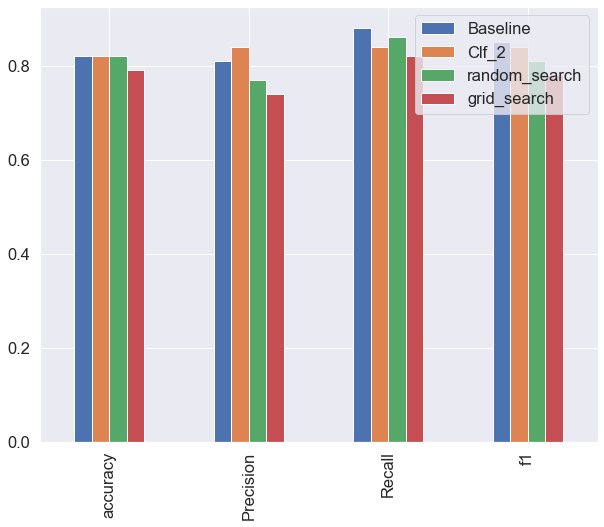

In [192]:
Compare_metrics =pd.DataFrame({"Baseline": Baseline_metrics,
                             "Clf_2": clf_2_metrics,
                             "random_search": rs_metrics,
                             "grid_search": Gs_metrics})
Compare_metrics.plot.bar(figsize = (10, 8));

## Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's pickle module
2. With the joblib module

https://docs.python.org/3/library/pickle.html

**Pickle**

In [196]:
import pickle 

# Save an existing model to file
pickle.dump(Gs_clf, open("Gs_RandomForest_model_1.pkl", "wb")) # wb-write binary

In [197]:
# Load a saved model 
Loaded_pickle_model =pickle.load(open("Gs_RandomForest_model_1.pkl", "rb"))

In [ ]:
# Make some predictions
Pickle_Y_preds = Loaded_pickle_model.predict(X_test)
evaluate_preds(Y_test, Pickle_Y_preds)

**Joblib module**

In [198]:
from joblib import dump, load

# Save model to file
dump(Gs_clf, filename = "Gs_RandomForest_model_1.joblib")

['Gs_RandomForest_model_1.joblib']

In [200]:
# Import a saved joblib model 
Loaded_joblib_model = load(filename="Gs_RandomForest_model_1.joblib")

In [ ]:
# Make and evaluate joblib predictions
Joblib_y_preds = Loaded_joblib_model.predict(X_test)
evaluate_preds(Y_test, Joblib_y_preds)

## Putting it all together


**Things to remember**
1. All data should be numerical
2. There should be no missing values
3. Manipulate the test set the same as the training set
4. Never test on data you have not tried
5. Tune hyperparameters on validation set OR use cross-validation
6. One best performance metric doesn't mean the best model

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [201]:
Data =pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")
Data 

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [202]:
Data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [203]:
Data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [213]:
# Getting data ready

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

#Import data and drop rows with missing labels
Data =pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")
Data.dropna(subset =["Price"], inplace = True)

# Define different features and transformer pipeline
Categorical_features = ["Make", "Colour"]
Categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                                         ("onehot", OneHotEncoder(handle_unknown ="ignore"))])

Door_features = ["Doors"]
Door_transformer = Pipeline(steps =[("imputer", SimpleImputer(strategy="constant", fill_value=4))])

Numeric_features = ["Odometer (KM)"]
Numeric_transformer = Pipeline(steps =[("imputer", SimpleImputer(strategy="mean"))])

# Setup preprocessing steps (fill missing values, then convert to numbers)
Preprocessor =ColumnTransformer(transformers =[("categorical", Categorical_transformer, Categorical_features),
                                              ("Door", Door_transformer, Door_features,),
                                              ("Numeric", Numeric_transformer, Numeric_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("Preprocessor", Preprocessor),
                       ("Model", RandomForestRegressor())])

# Split data
X =Data.drop("Price", axis =1)
Y = Data["Price"]
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2)

# Fit and score the model
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.22188417408787875

Its also possible to use GridSearchCV or RandomizedSearchCV with our pipeline

In [220]:
# Use GridsearchCV with our regression Pipeline 
from sklearn.model_selection import GridSearchCV

Pipe_grid = {
    "Preprocessor__Numeric__imputer__strategy":["mean", "median"], 
    "Model__n_estimators": [100, 1000],
    "Model__max_depth": [None, 5],
    "Model__max_features": ["auto"],
    "Model__min_samples_split":[2, 4]
}
Gs_model = GridSearchCV(model, Pipe_grid, cv = 5, verbose =2)
Gs_model.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] Model__max_depth=None, Model__max_features=auto, Model__min_samples_split=2, Model__n_estimators=100, Preprocessor__Numeric__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  Model__max_depth=None, Model__max_features=auto, Model__min_samples_split=2, Model__n_estimators=100, Preprocessor__Numeric__imputer__strategy=mean, total=   0.5s
[CV] Model__max_depth=None, Model__max_features=auto, Model__min_samples_split=2, Model__n_estimators=100, Preprocessor__Numeric__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  Model__max_depth=None, Model__max_features=auto, Model__min_samples_split=2, Model__n_estimators=100, Preprocessor__Numeric__imputer__strategy=mean, total=   0.3s
[CV] Model__max_depth=None, Model__max_features=auto, Model__min_samples_split=2, Model__n_estimators=100, Preprocessor__Numeric__imputer__strategy=mean 
[CV]  Model__max_depth=None, Model__max_features=auto, Model__min_samples_split=2, Model__n_estimators=100, Preprocessor__Numeric__imputer__strategy=mean, total=   0.3s
[CV] Model__max_depth=None, Model__max_features=auto, Model__min_samples_split=2, Model__n_estimators=100, Preprocessor__Numeric__imputer__strategy=mean 
[CV]  Model__max_depth=None, Model__max_features=auto, Model__min_samples_split=2, Model__n_estimators=100, Preprocessor__Numeric__imputer__strategy=mean, total=   0.3s
[CV] Model__max_depth=None, Model__max_features=auto, Model__min_samples_split=2, Model__n_estimators=100, Preprocessor__Numeric__imputer__strategy=mean 
[CV]  Model__max_depth=None, Mo

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('Preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('categorical',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                            

In [221]:
Gs_model.score(X_test, Y_test)

0.3339554263158365